In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_hdf("train.h5")

### First look at the dataset

In [3]:
df.shape

(1710756, 111)

In [4]:
df.head()

id  timestamp  derived_0  derived_1  derived_2  derived_3  derived_4  \
0  10          0   0.370326  -0.006316   0.222831  -0.213030   0.729277   
1  11          0   0.014765  -0.038064  -0.017425   0.320652  -0.034134   
2  12          0  -0.010622  -0.050577   3.379575  -0.157525  -0.068550   
3  25          0        NaN        NaN        NaN        NaN        NaN   
4  26          0   0.176693  -0.025284  -0.057680   0.015100   0.180894   

   fundamental_0  fundamental_1  fundamental_2    ...     technical_36  \
0      -0.335633       0.113292       1.621238    ...         0.775208   
1       0.004413       0.114285      -0.210185    ...         0.025590   
2      -0.155937       1.219439      -0.764516    ...         0.151881   
3       0.178495            NaN      -0.007262    ...         1.035936   
4       0.139445      -0.125687      -0.018707    ...         0.630232   

   technical_37  technical_38  technical_39  technical_40  technical_41  \
0           NaN           NaN           NaN     -0.414776           NaN   
1           NaN           NaN           NaN     -0.273607           NaN   
2           NaN           NaN           NaN     -0.175710           NaN   
3           NaN           NaN           NaN     -0.211506           NaN   
4           NaN           NaN           NaN     -0.001957           NaN   

   technical_42  technical_43  technical_44         y  
0           NaN          -2.0           NaN -0.011753  
1           NaN          -2.0           NaN -0.001240  
2           NaN          -2.0           NaN -0.020940  
3           NaN          -2.0           NaN -0.015959  
4           NaN           0.0           NaN -0.007338  

[5 rows x 111 columns]

So we have more than 100 features or prediction variables. We can also see a bunch of missing values in our dataset. 

***No other information has been provided through the challenge about the data.*



### Lets remove/handle the missing data

In [5]:
#df.describe()

To get a better idea of the dataset in terms of values each feature holds


In [6]:
df.isnull().any()

id                False
timestamp         False
derived_0          True
derived_1          True
derived_2          True
derived_3          True
derived_4          True
fundamental_0      True
fundamental_1      True
fundamental_2      True
fundamental_3      True
fundamental_5      True
fundamental_6      True
fundamental_7      True
fundamental_8      True
fundamental_9      True
fundamental_10     True
fundamental_11     True
fundamental_12     True
fundamental_13     True
fundamental_14     True
fundamental_15     True
fundamental_16     True
fundamental_17     True
fundamental_18     True
fundamental_19     True
fundamental_20     True
fundamental_21     True
fundamental_22     True
fundamental_23     True
                  ...  
technical_13       True
technical_14       True
technical_16       True
technical_17       True
technical_18       True
technical_19       True
technical_20       True
technical_21       True
technical_22      False
technical_24       True
technical_25    

Most of the columns look like they have null values so we can consider interpolating data. Since, no information about the dataset is available we will avoid that and look at row wise values.

In [7]:
#Super slow method to find all the rows with no NaN values in any of the columns

#count=0
#for x in range(len(df)-1710750):
#    if not any(df.isnull().values[x]):
#        count=count+1


In [66]:
df_clean=df.dropna(axis='index',how='any')
df_clean.shape

(223040, 111)

In [9]:
df_clean.shape[0]/df.shape[0]*100

13.03751090161309

So only 13% of the records(timestamps) have values in all columns. Lets look how each column performs in terms of missing data. This information might help in deciding if we should interpolate missing data or directly remove it.

In [10]:
def count_missing(df):
    stats={}
    for x in range(len(df.columns)):        
        stats[df.columns[x]]=df[df.columns[x]].isnull().sum()/len(df[df.columns[x]])*100
    return stats

In [11]:
res=count_missing(df)


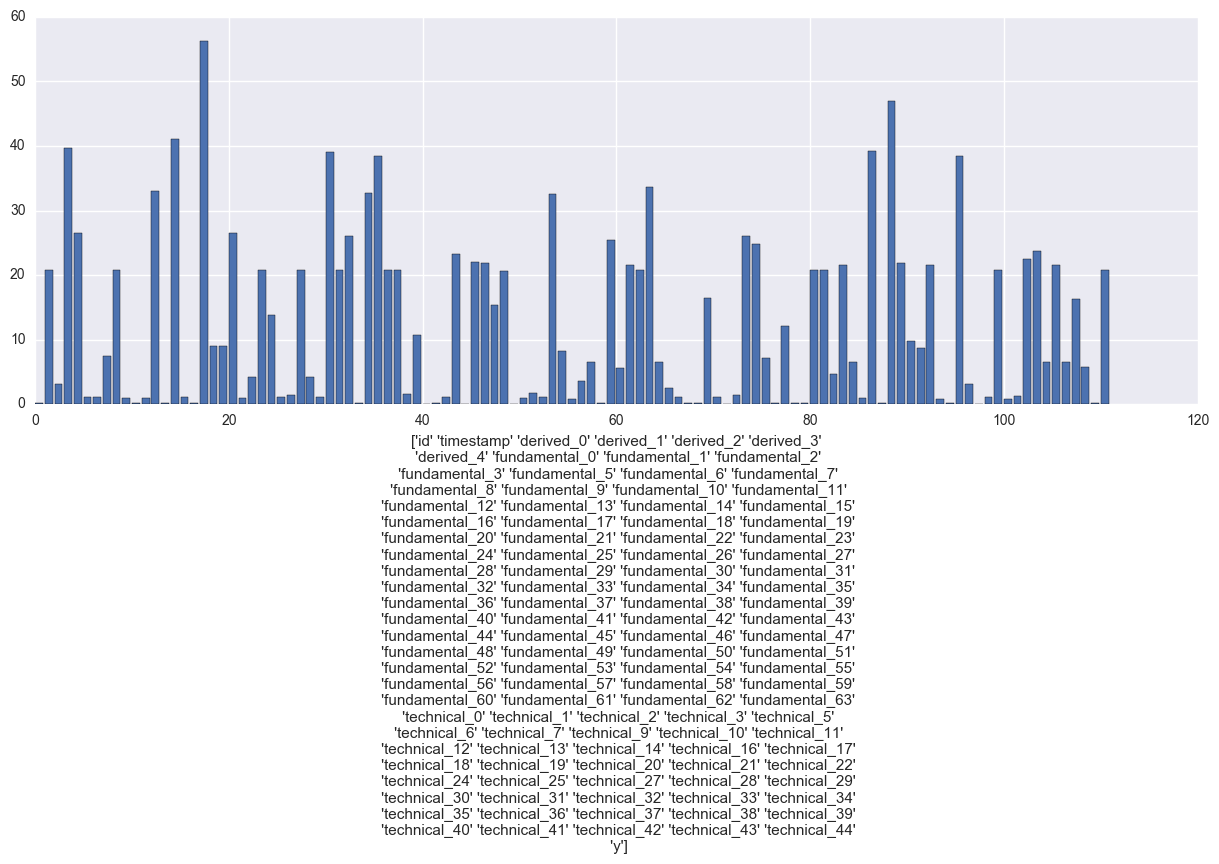

In [12]:
plt.figure(figsize=(15,5))
plt.bar(left=range(0,111),height=res.values())
plt.xlabel((df.columns.values))


### What all can we do with the missing data now...

1. Remove it   
2. Interpolate (but with no information about the data, it's kind of a shot in the dark)-choosing the appropriate   
method is also tough
3. Anything else I should know? :/   


Let's try to plot the ones which have low errors and see if we can identify any trends

In [59]:
low_err={k:v for (k,v) in res.items() if v<0.5}
del low_err['id']
del low_err['timestamp']
del low_err['y']
print((low_err),len(low_err))


{'technical_11': 0.25012333728480274, 'technical_40': 0.13070244967721872, 'technical_27': 0.14145792854153369, 'technical_36': 0.14917381555289005, 'technical_2': 0.25012333728480274, 'technical_13': 0.27847337668258948, 'technical_21': 0.13070244967721872, 'technical_34': 0.0, 'technical_22': 0.0, 'technical_20': 0.27847337668258948, 'technical_43': 0.27391398890315155, 'technical_17': 0.25012333728480274, 'technical_35': 0.18442139030931354, 'technical_6': 0.25012333728480274, 'technical_7': 0.13070244967721872, 'technical_19': 0.13561255959353644, 'technical_30': 0.27847337668258948} 17


We will try to plot the features with less than 0.5% error and see if we can find any pattern in some of the features

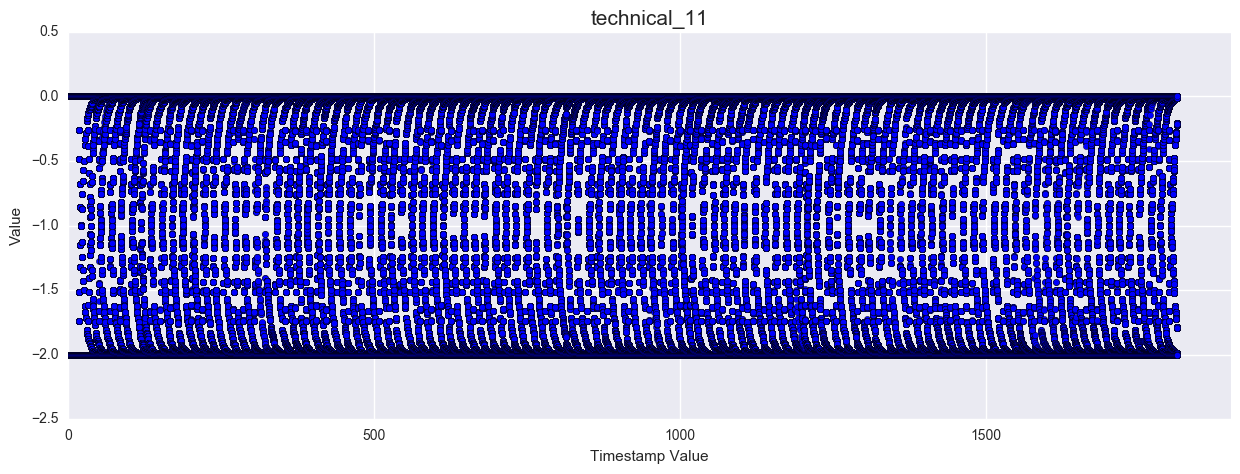

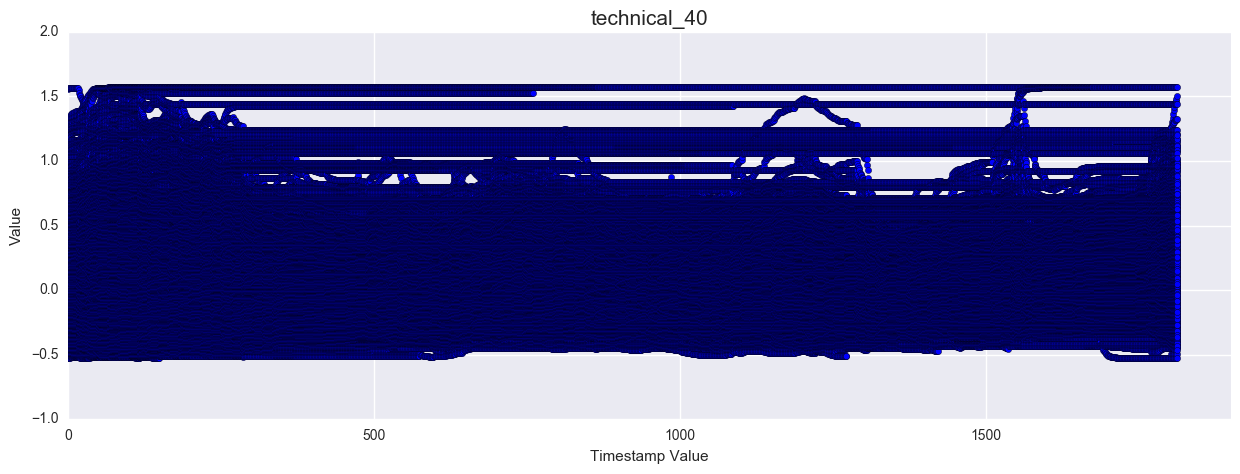

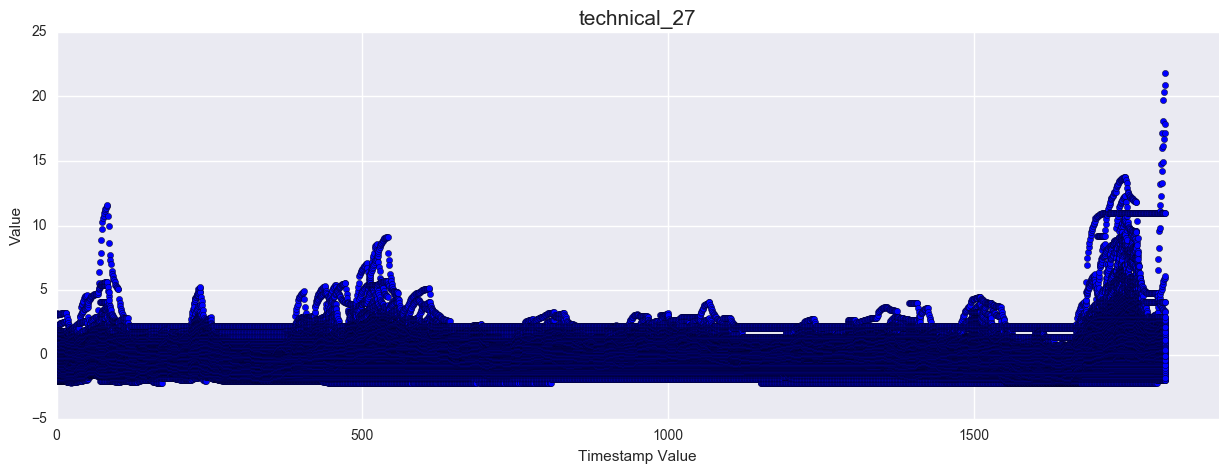

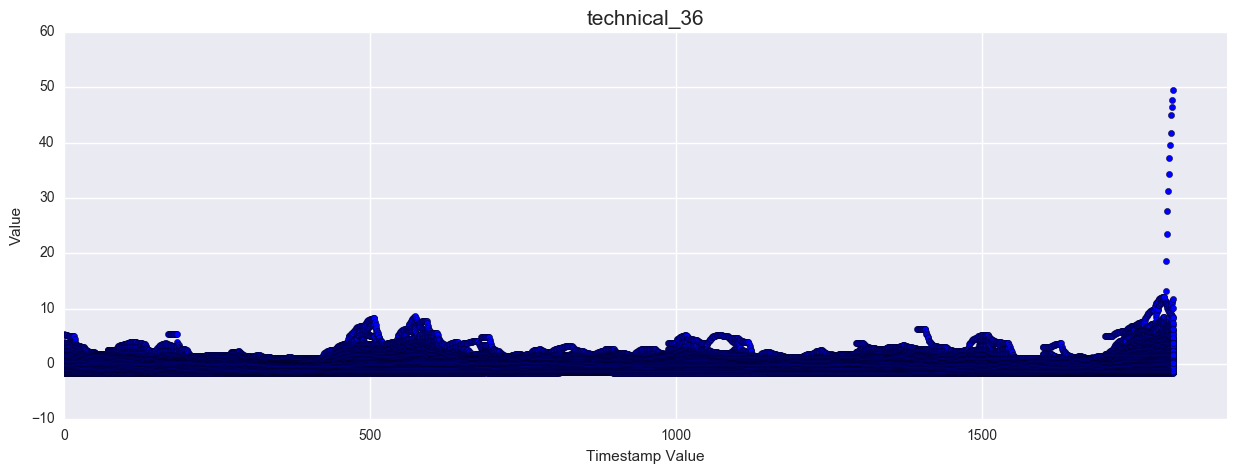

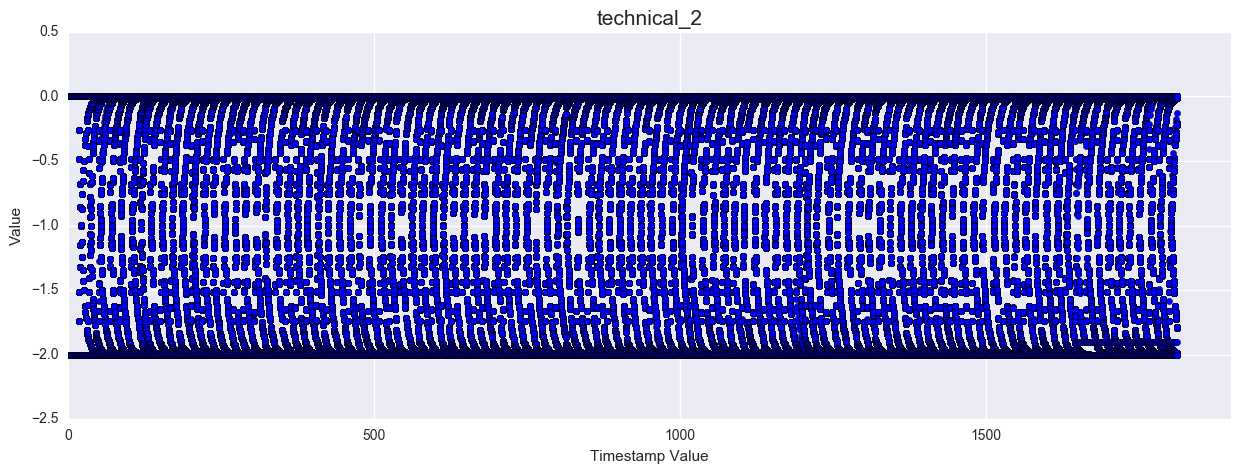

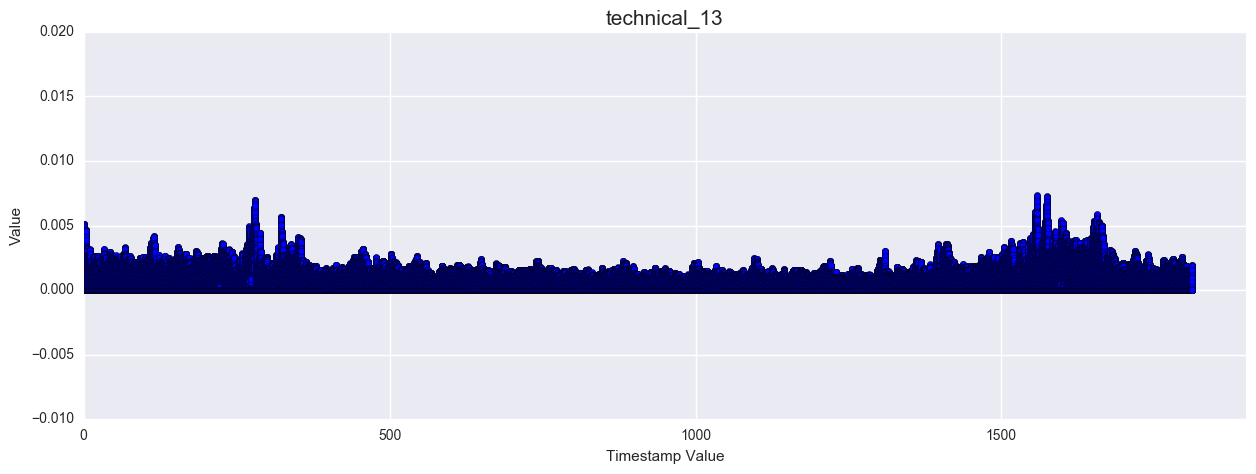

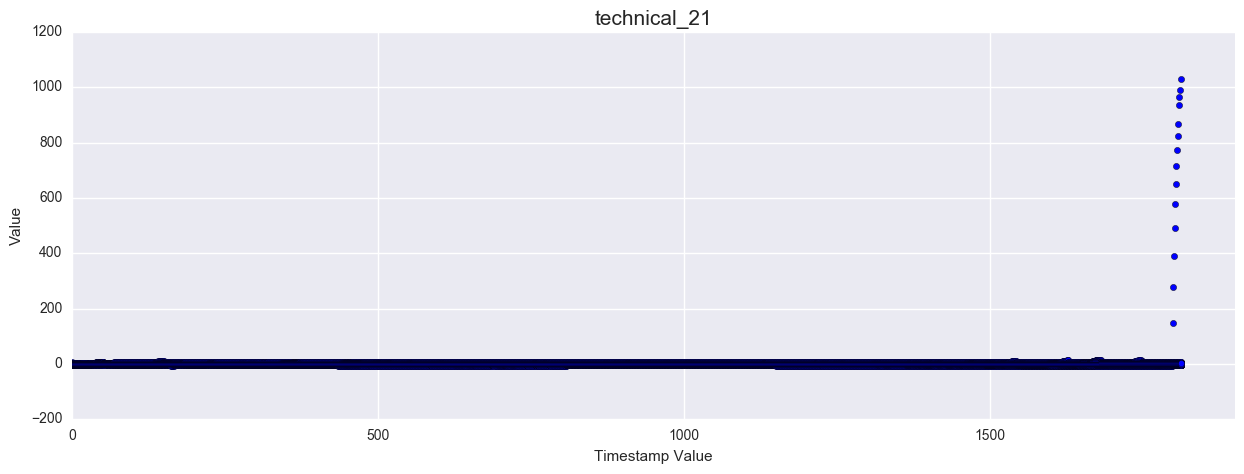

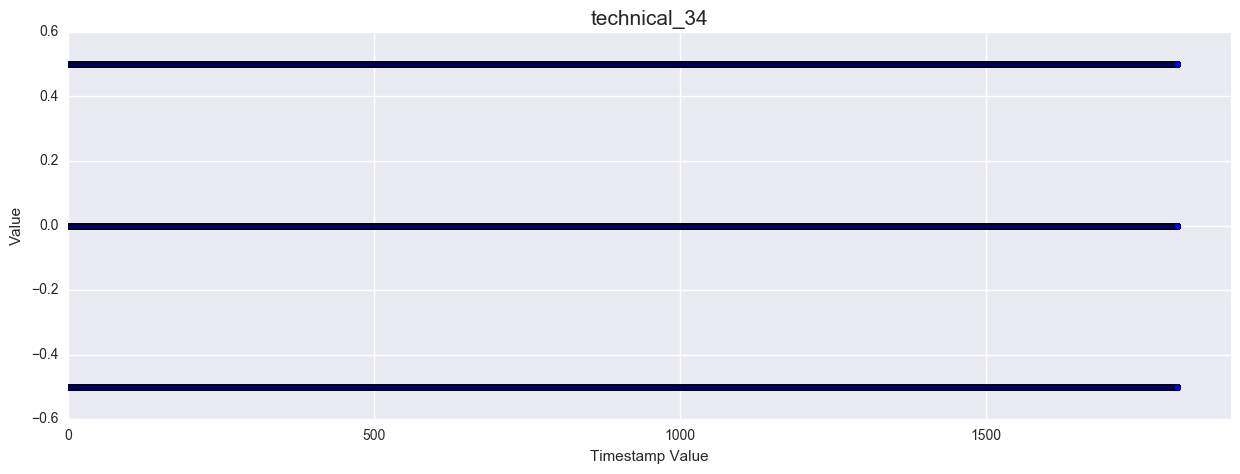

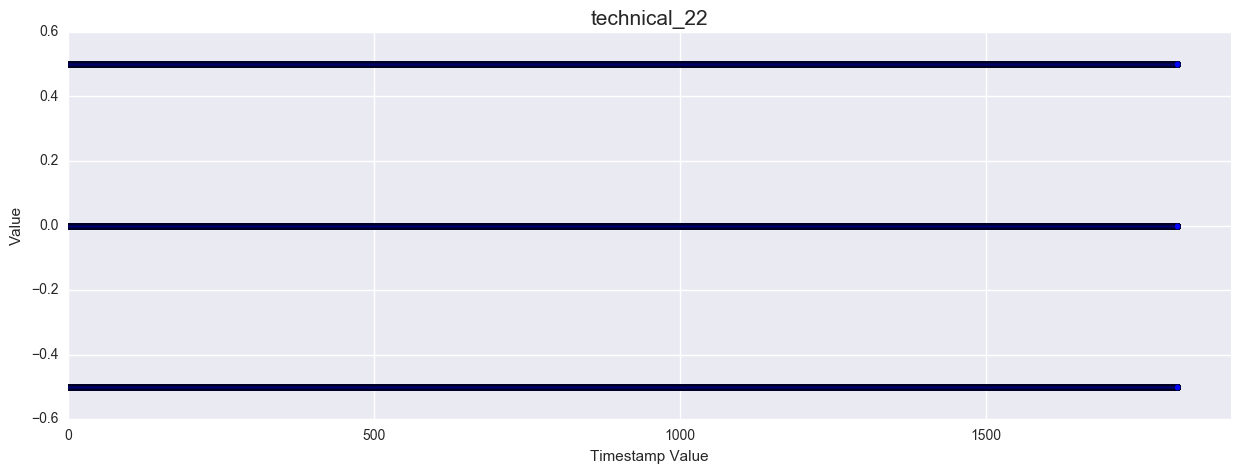

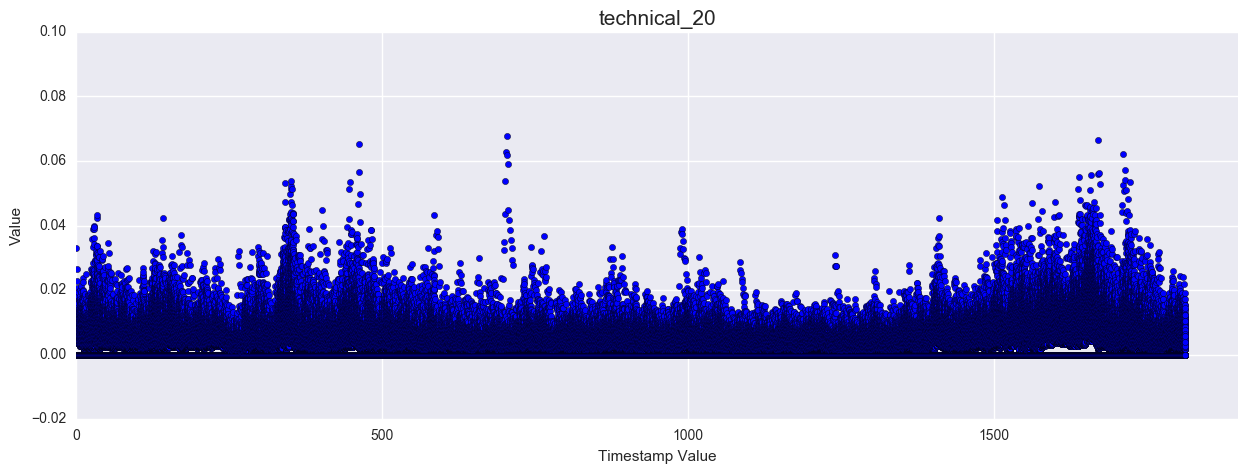

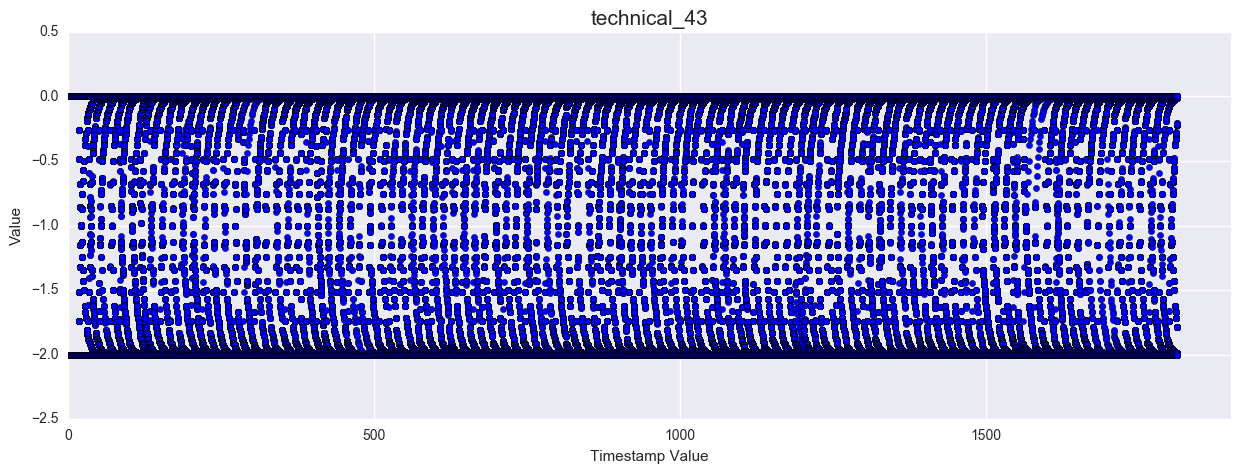

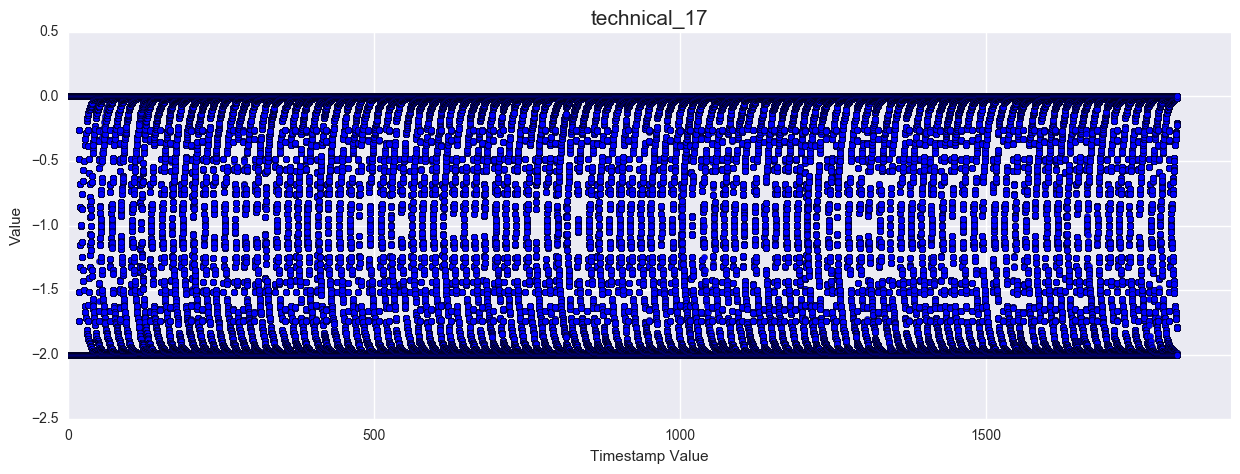

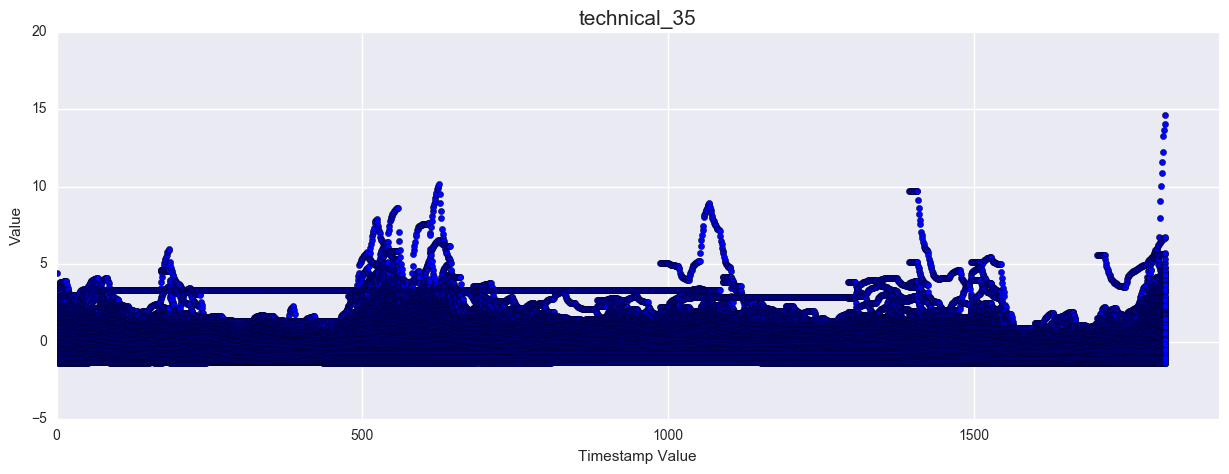

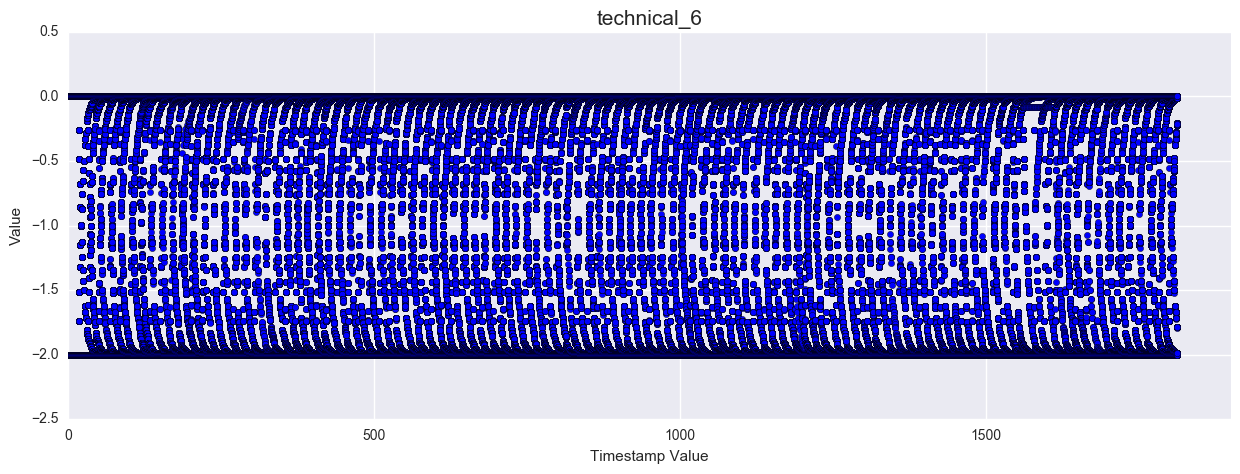

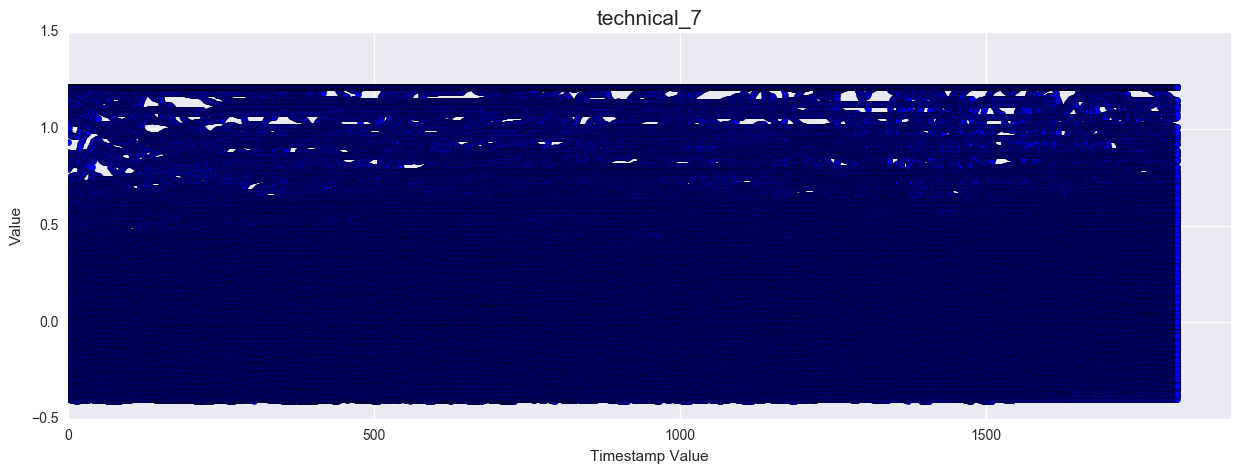

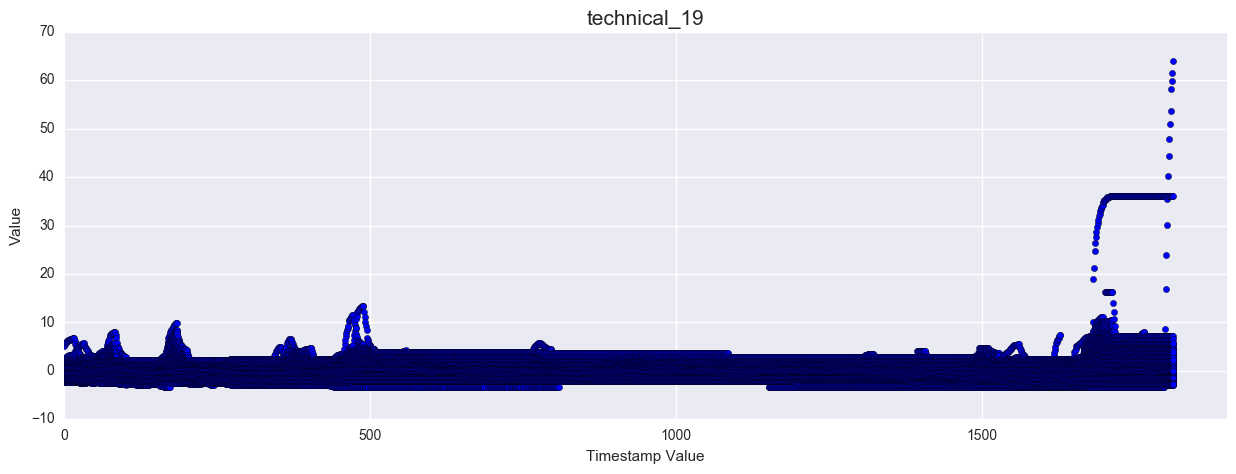

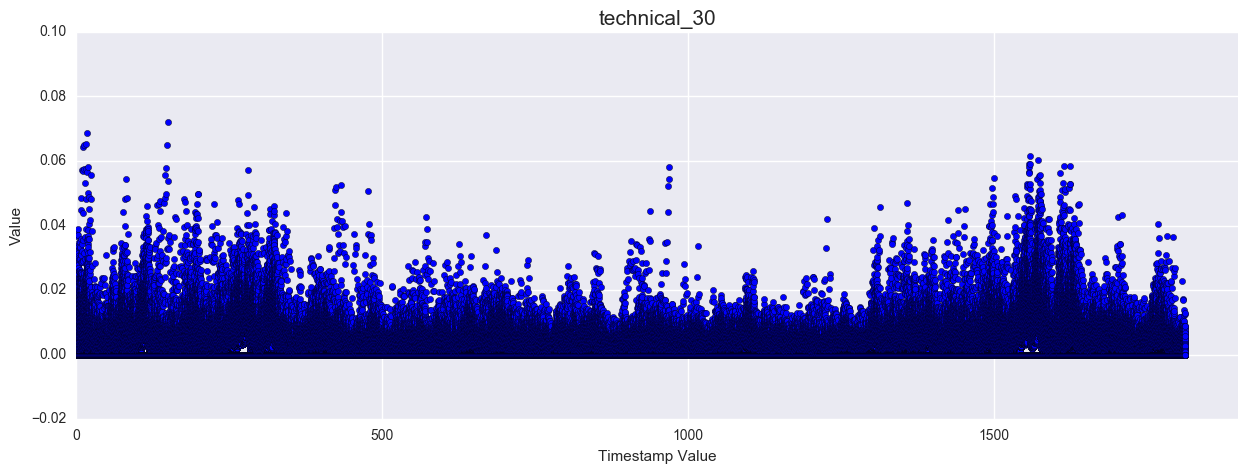

In [14]:
l=list(low_err.keys())
for i in range(len(low_err)):
    plt.figure(figsize=(15,5))
    plt.scatter(y=df[l[i]],x=df['timestamp'])
    plt.title(l[i],fontsize=15)
    plt.xlabel('Timestamp Value')
    plt.ylabel('Value')
    plt.xlim(0,1900)

### Let's now look at the distribution of data in these features.

/Users/Ayush/miniconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


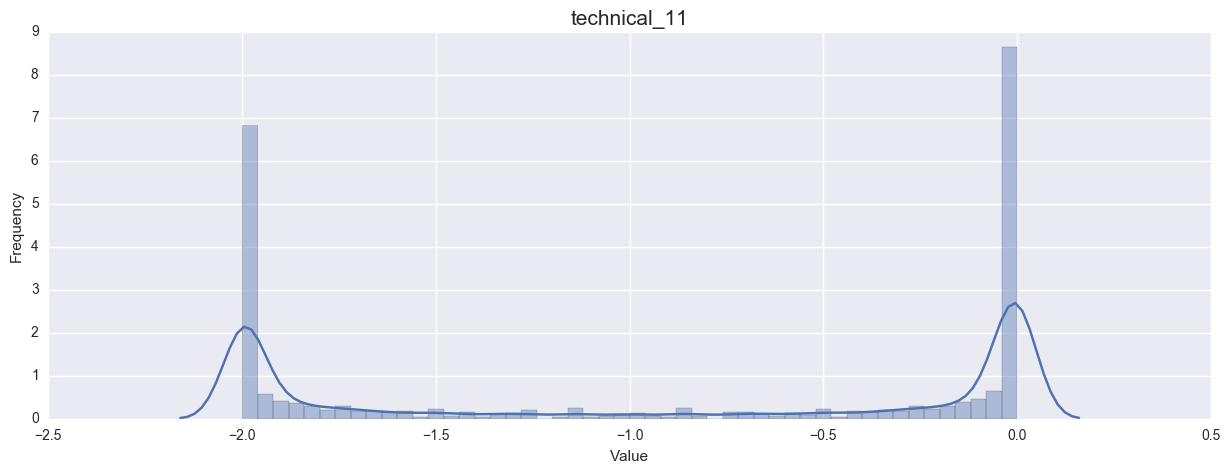

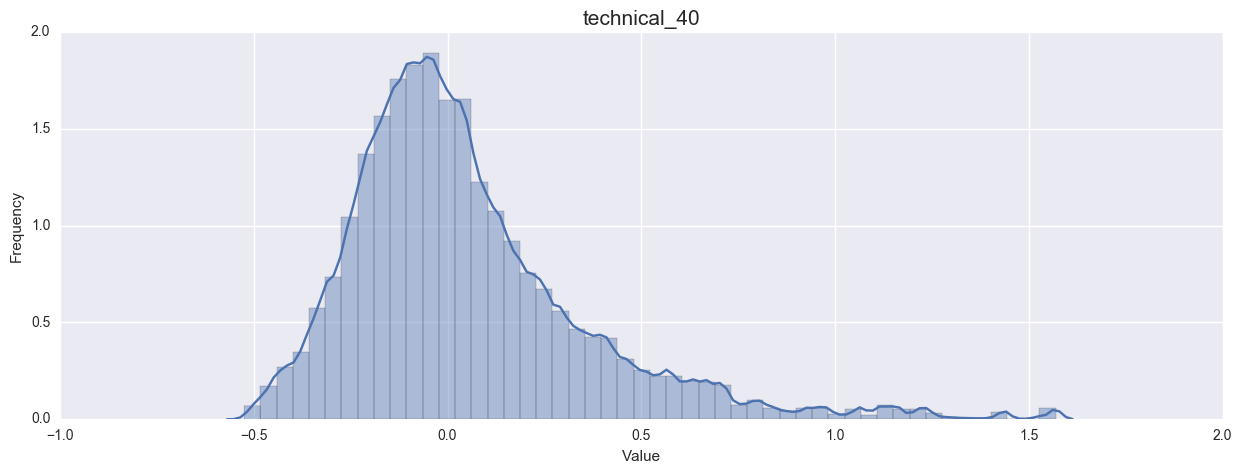

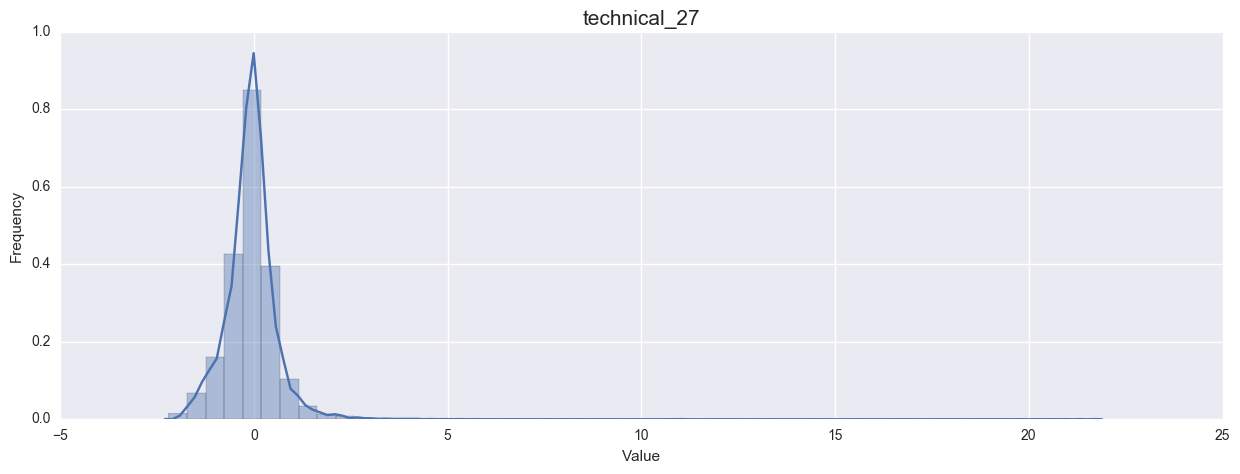

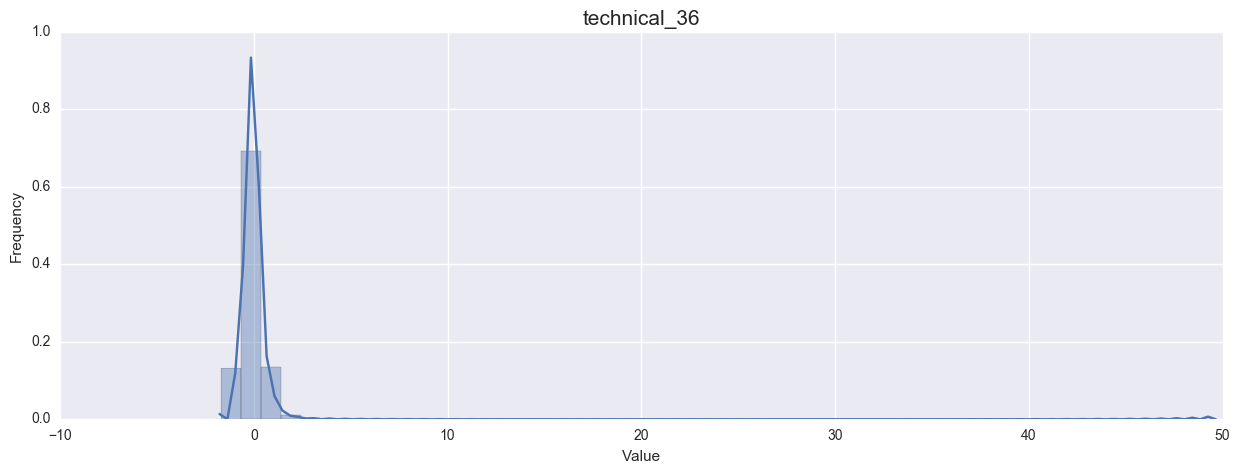

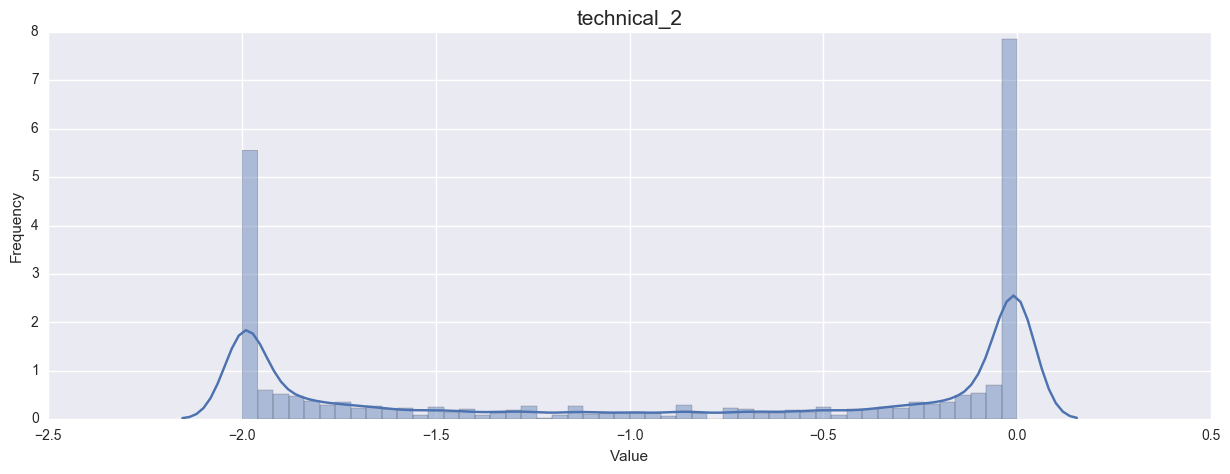

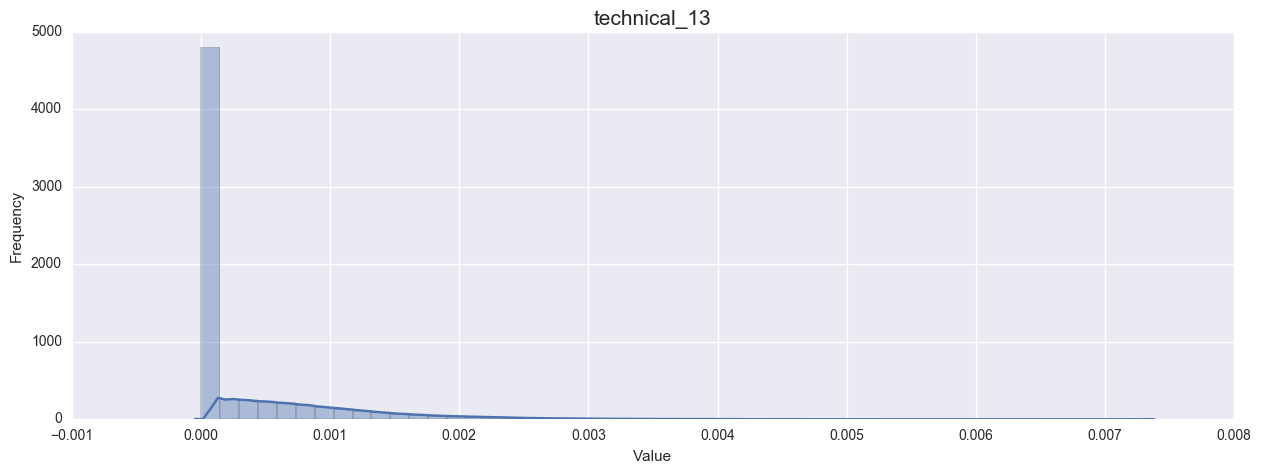

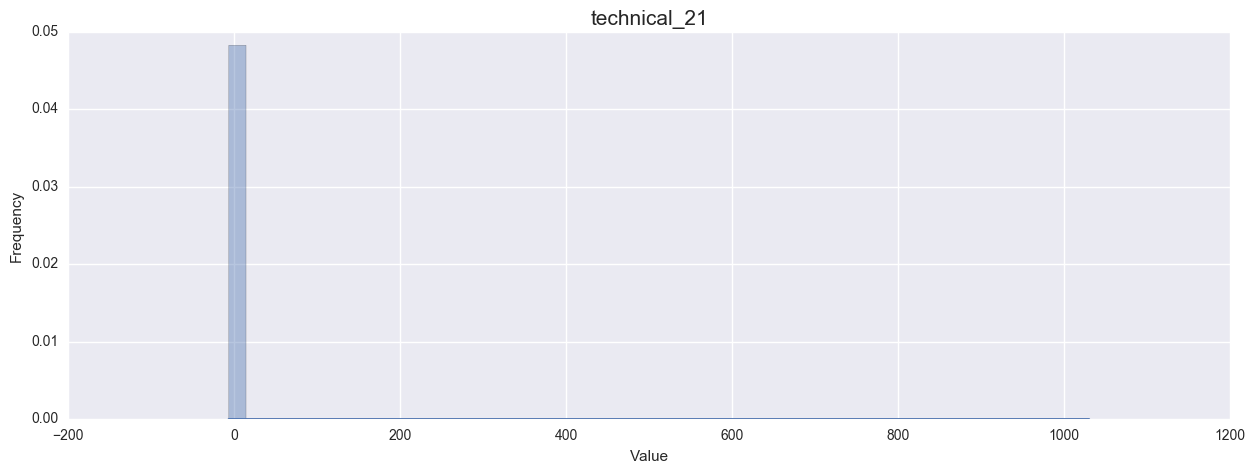

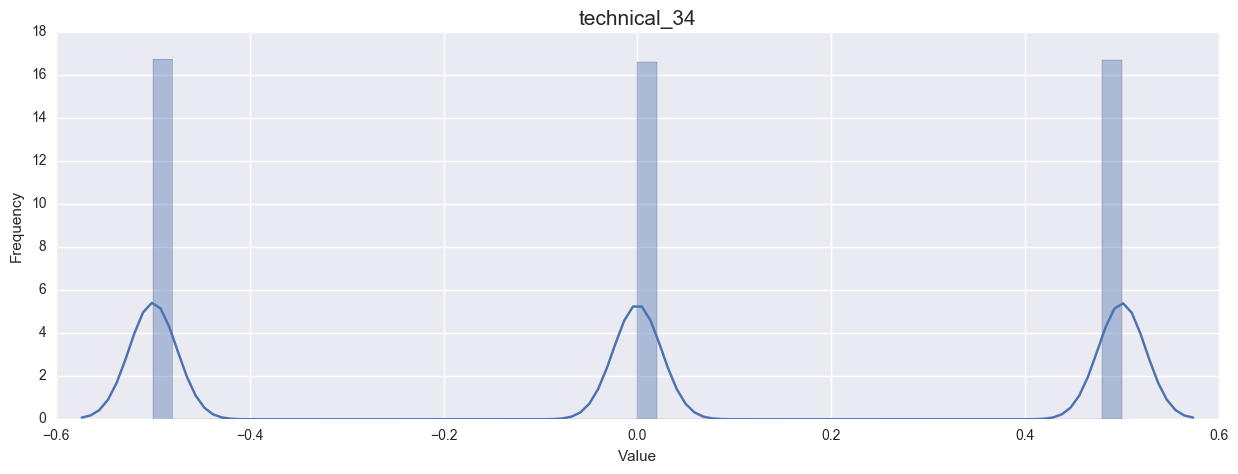

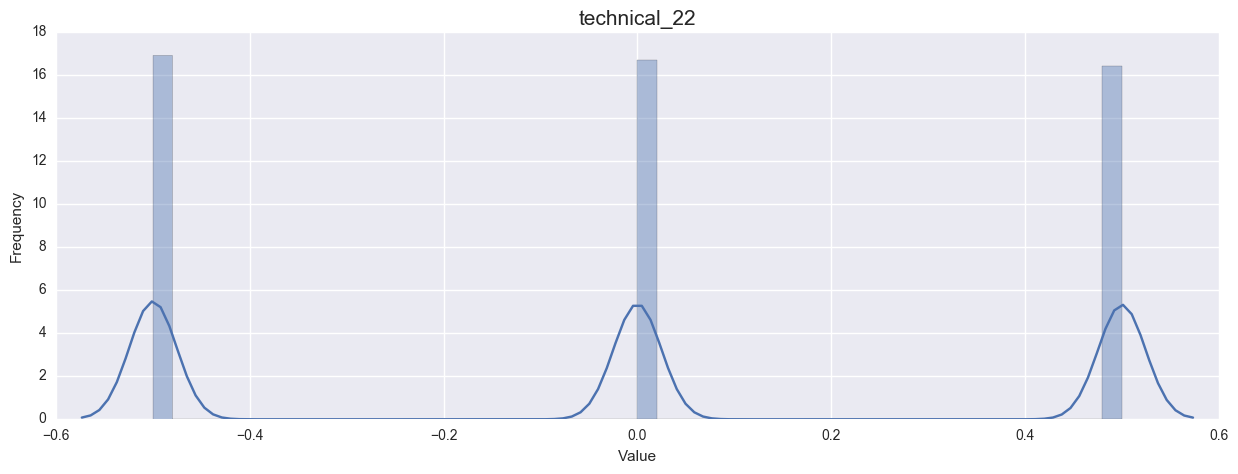

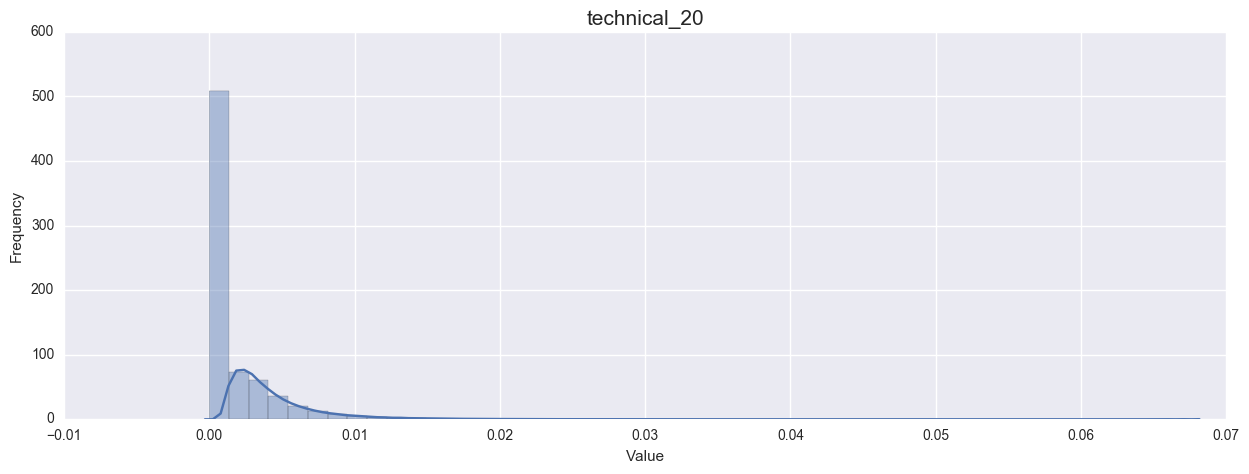

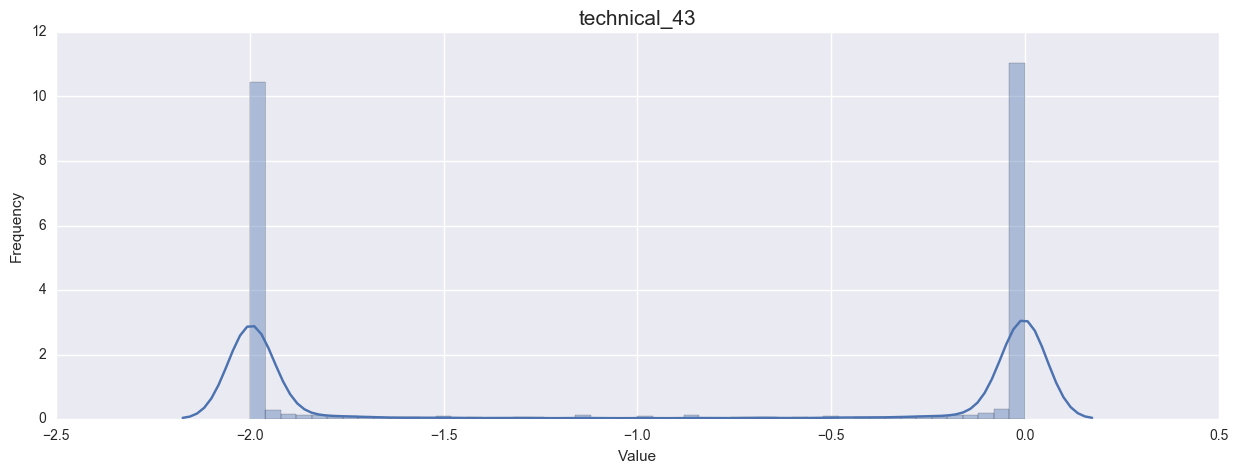

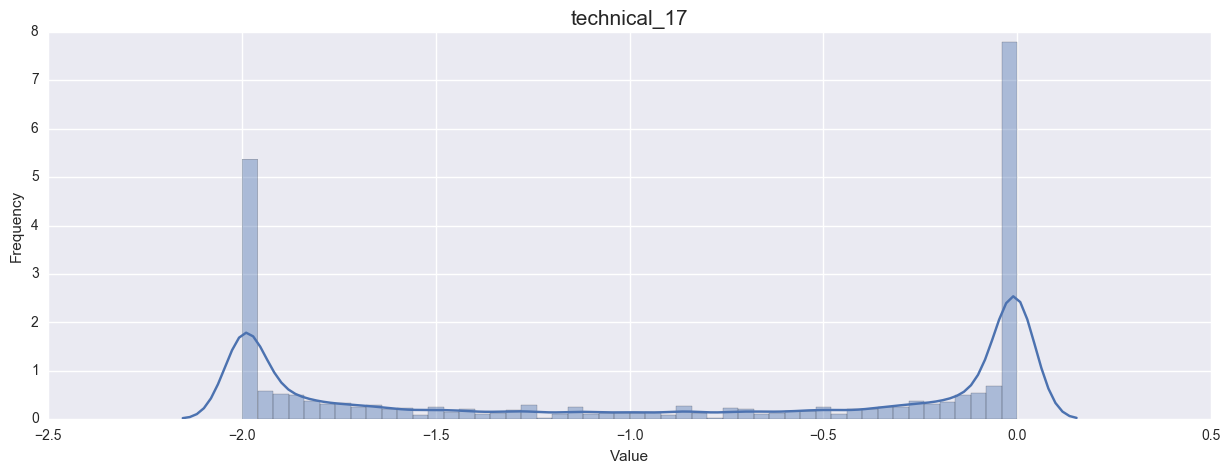

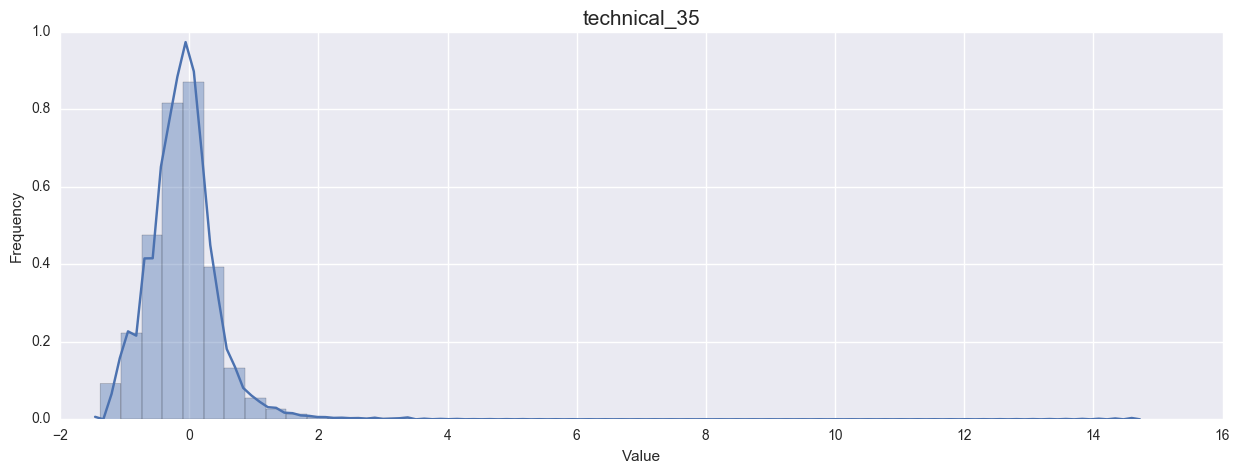

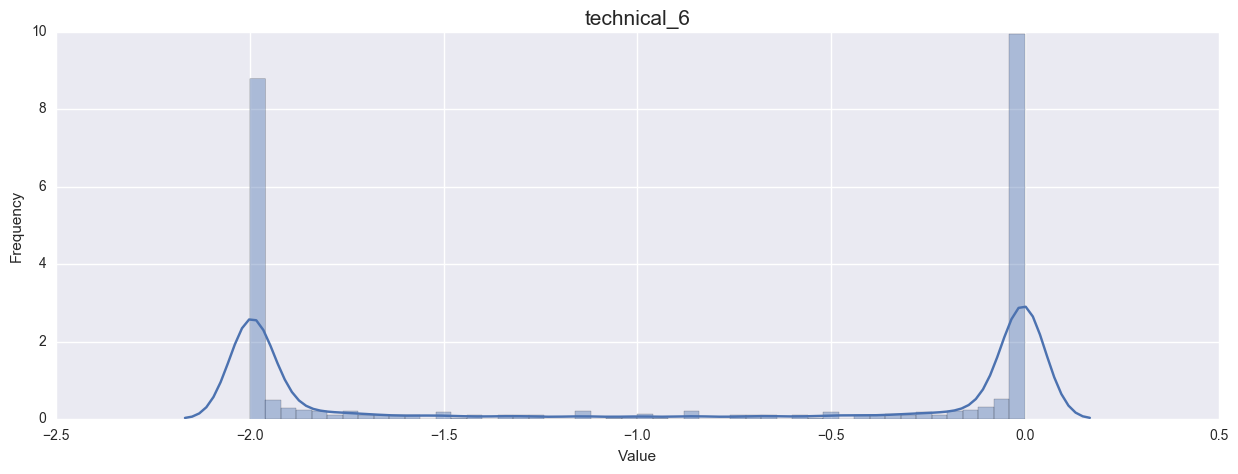

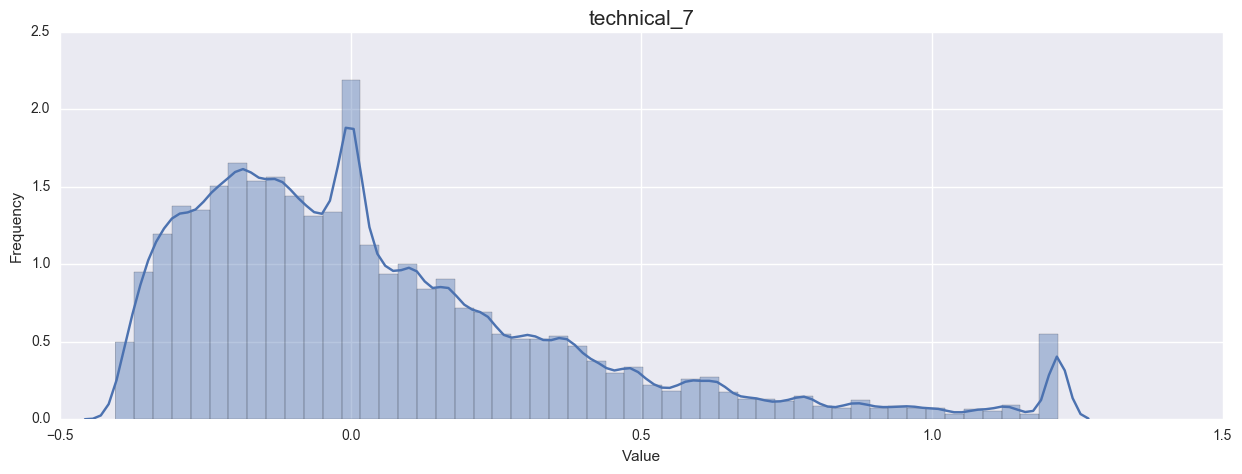

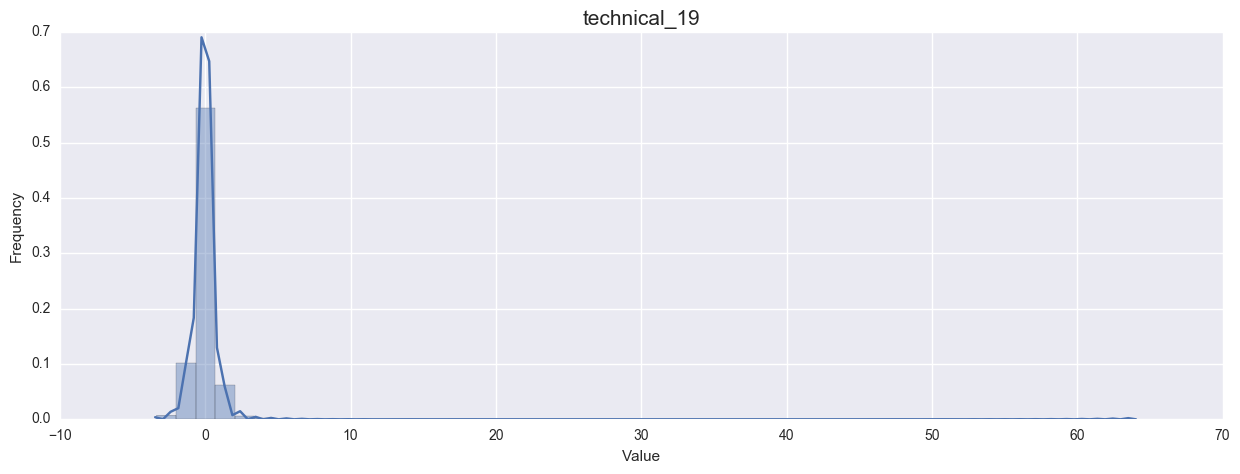

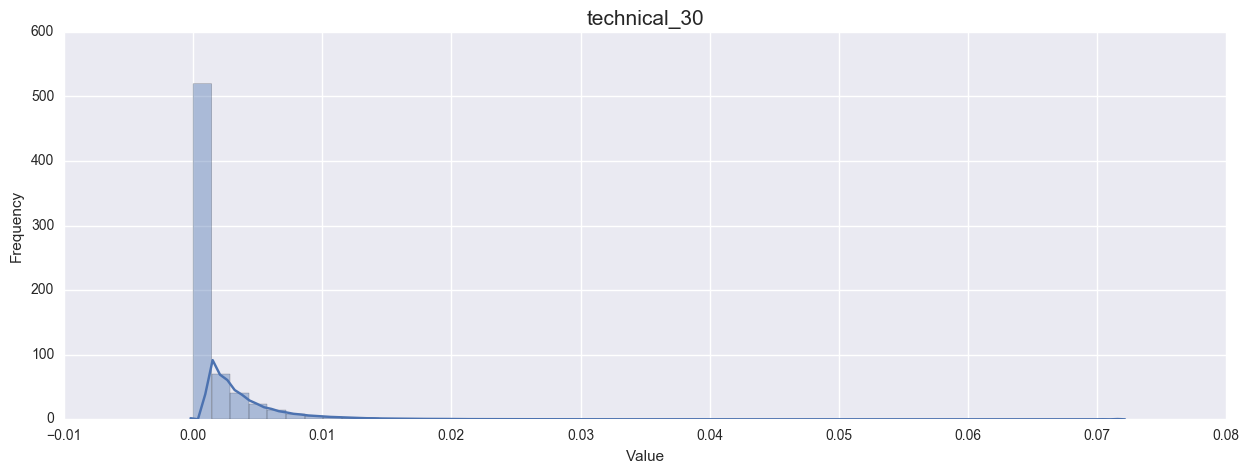

In [30]:
for i in range(len(low_err)):
    plt.figure(figsize=(15,5))
    #plt.scatter(y=df[l[i]],x=df['timestamp'])
    sns.distplot(df[l[i]].dropna().values)  #Removed NaN values for now
    plt.title(l[i],fontsize=15)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    

### Checking correlation of all the features (total 108 for now) with y.     
*Note: We used df_clean and not df here.*

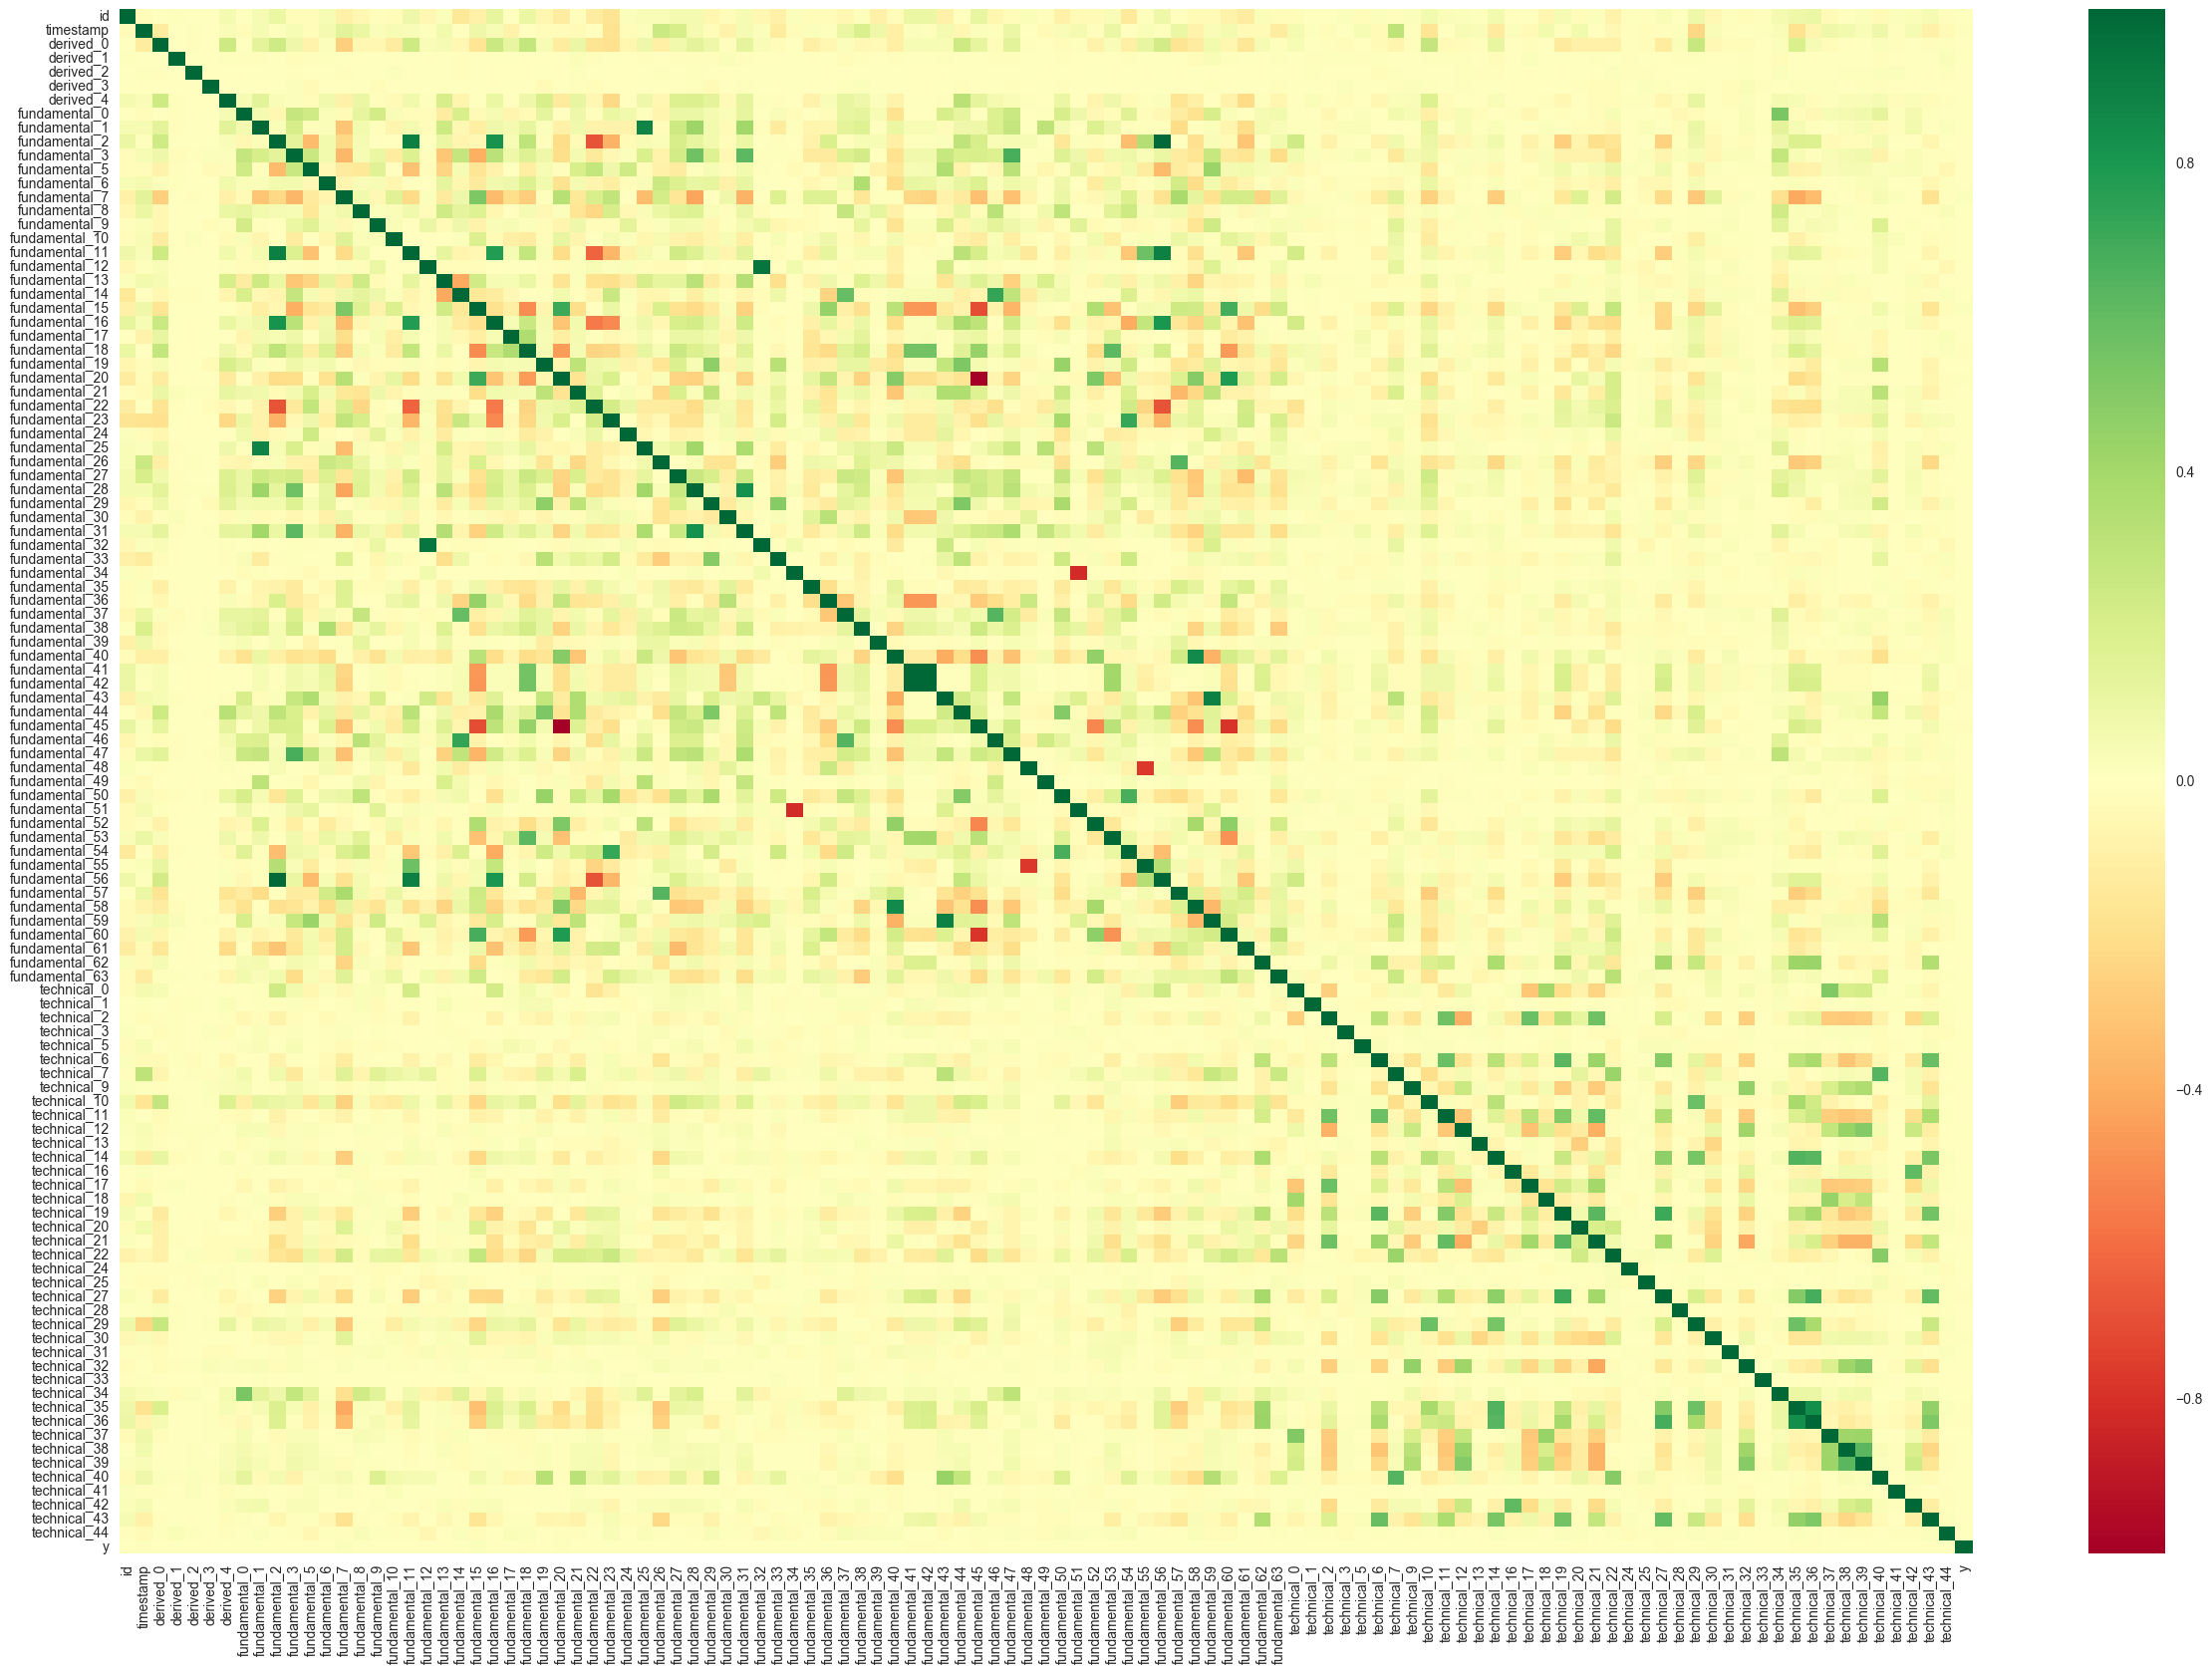

In [69]:
plt.figure(figsize=(30,20))
sns.heatmap(df_clean.corr(method='pearson', min_periods=1),cmap='RdYlGn')


### None of the features have a strong linear correlation with y (We checked for pearson correlation here). Spearman correation takes a lot of processing time and thus we will limit it to features which have less than 0.5% missing values in the dataset.

### Some observation points:

1. Features under the tag of "fundamental" have some kind of correlation among them as you can see from the box in top left quadrant of the heatmap. Similarly, "technical" features are somewhat related to each other (bottom right quadrant).    
2. A relatively lower correlation is seen between the two types of features. (Not a lot of greens and reds in the top right and bottom left quadrant of the heatmap).     
3. Some of the features have close correlation to their neighbors as can be seen from green clusters on the diagnol.





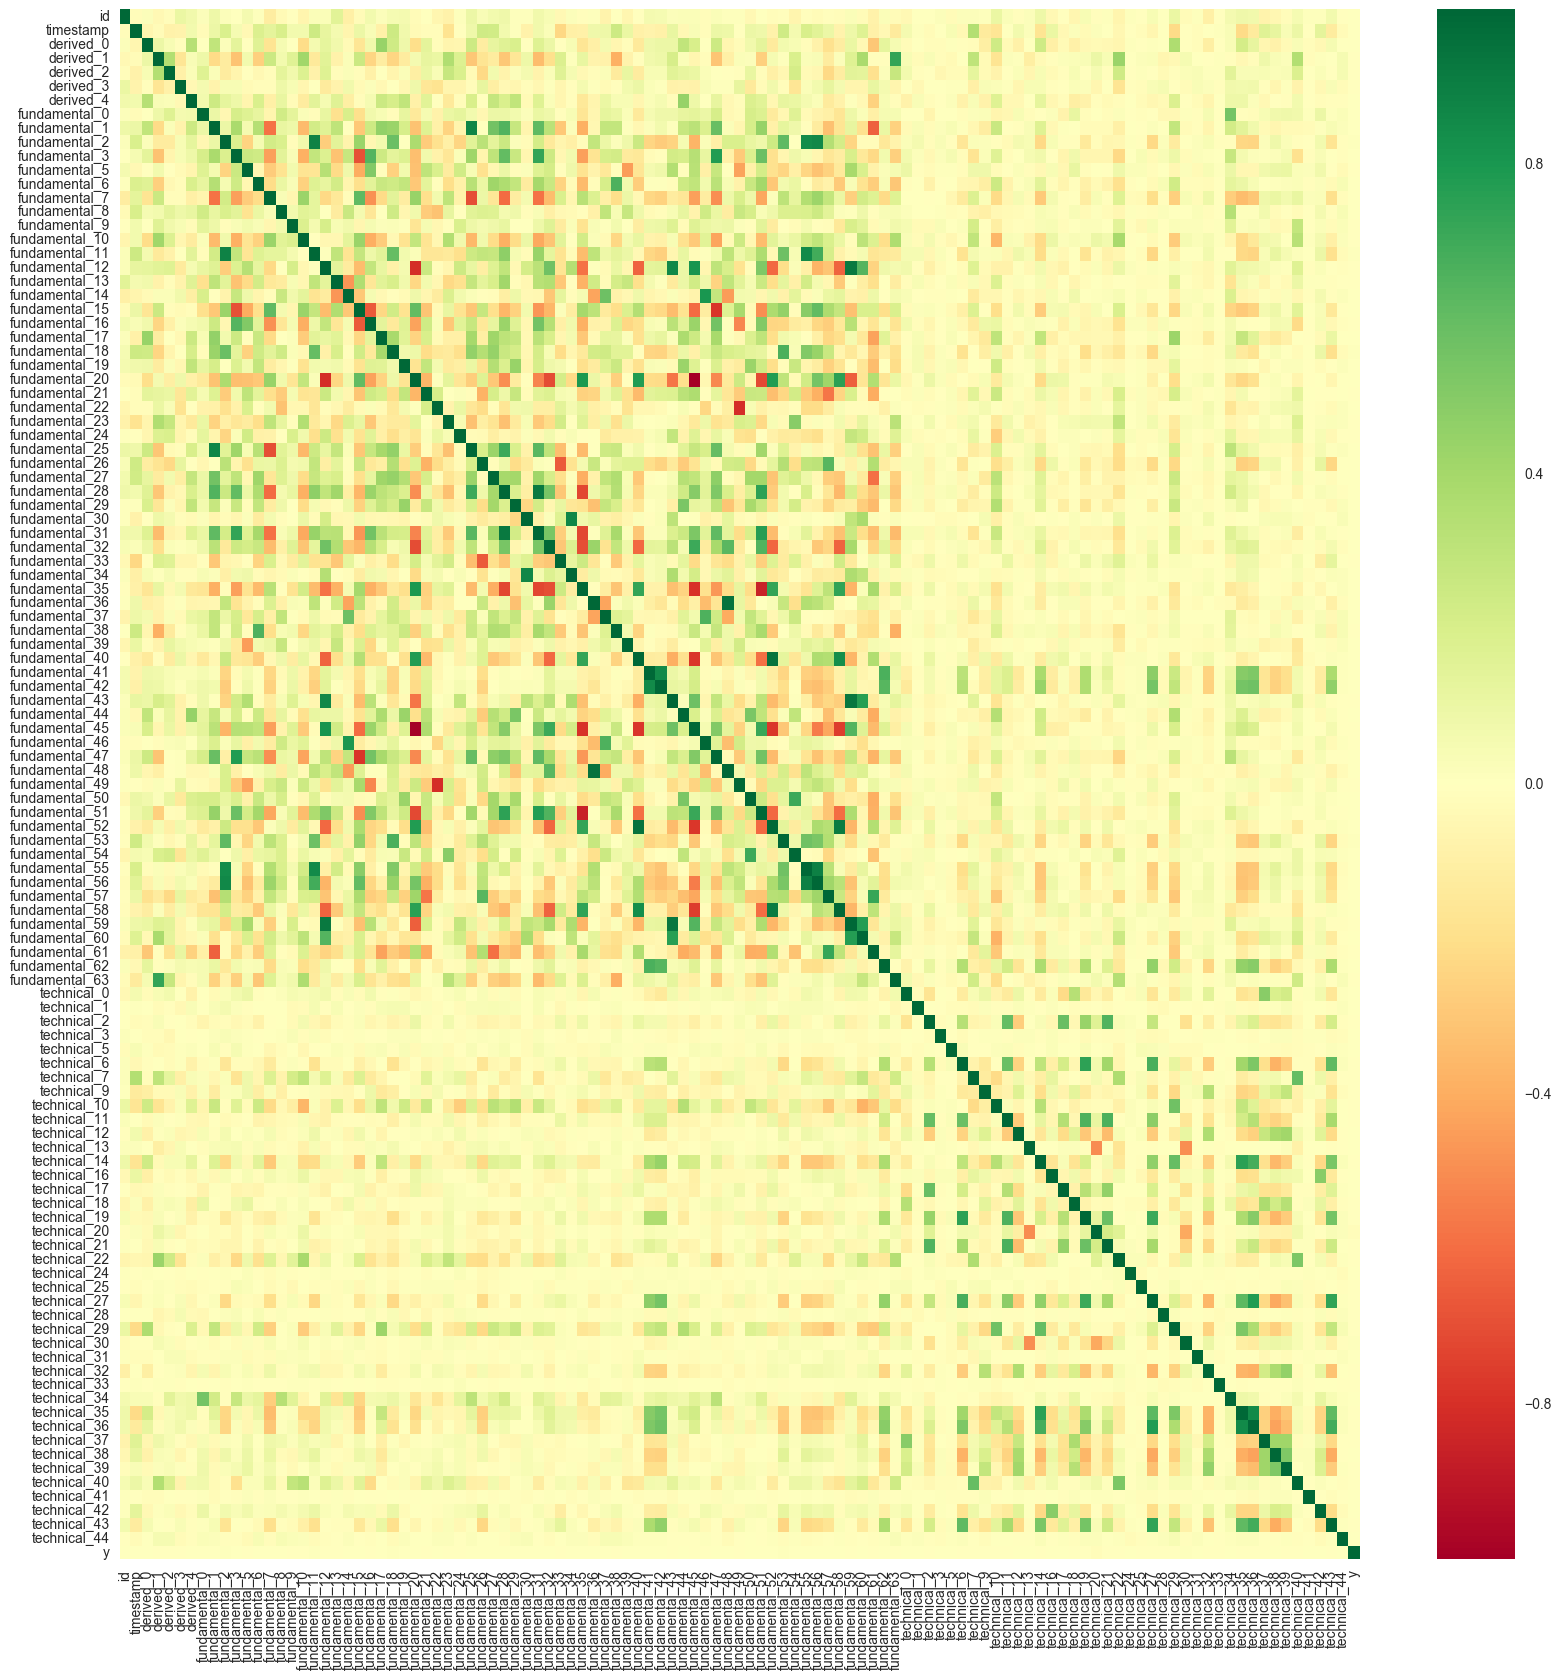

In [68]:
plt.figure(figsize=(20,20))
sns.heatmap(df_clean.corr(method='spearman', min_periods=1),cmap='RdYlGn')



Spearman correlation reinforces the observation points while checking non-linear correlations as well.

### Ok this exploration stuff is getting boring now. Lets try some regression methods and see what we get from the clean dataset (~13% of the total values).